Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2798 - accuracy: 0.9146
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1219 - accuracy: 0.9634
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0919 - accuracy: 0.9734
INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


313/313 [==============================] - 1s 2ms/step - loss: 0.1155 - accuracy: 0.9663
0.11545760184526443
0.9663000106811523
1/1 [==============================] - 0s 66ms/step
This digit is probably a 1


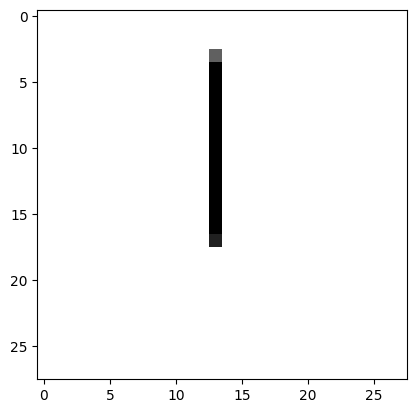

1/1 [==============================] - 0s 20ms/step
This digit is probably a 2


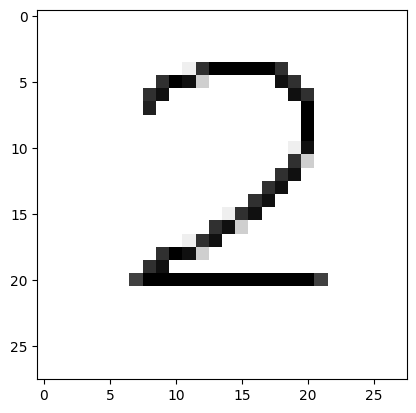

1/1 [==============================] - 0s 21ms/step
This digit is probably a 8


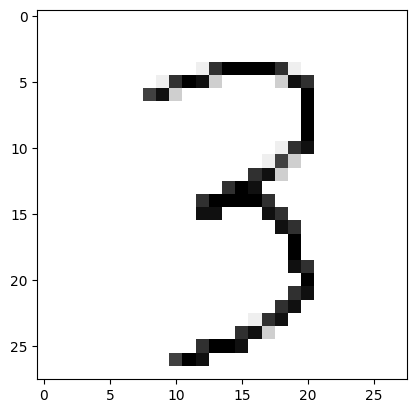

1/1 [==============================] - 0s 22ms/step
This digit is probably a 8


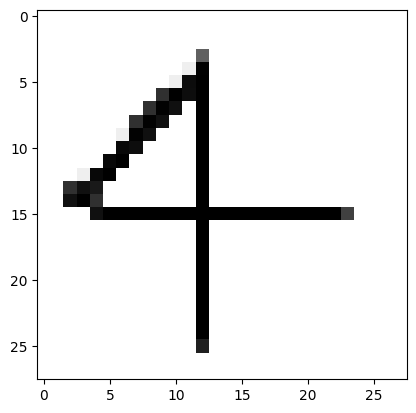

1/1 [==============================] - 0s 21ms/step
This digit is probably a 5


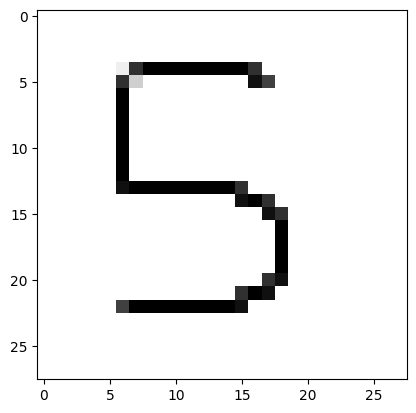

1/1 [==============================] - 0s 35ms/step
This digit is probably a 6


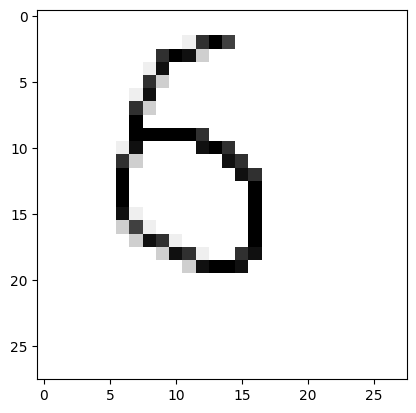

1/1 [==============================] - 0s 19ms/step
This digit is probably a 7


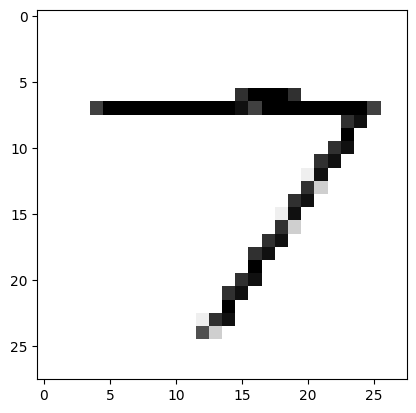

1/1 [==============================] - 0s 40ms/step
This digit is probably a 3


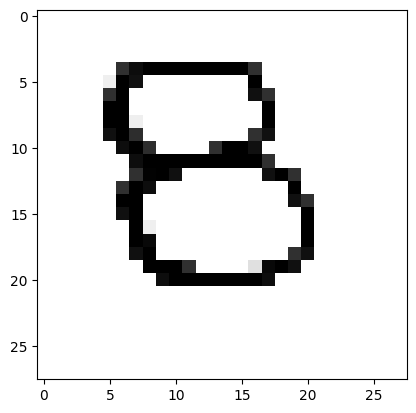

1/1 [==============================] - 0s 32ms/step
This digit is probably a 7


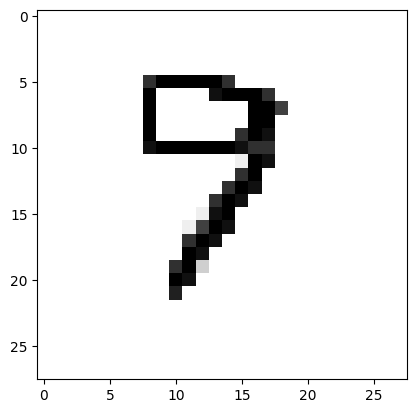

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)



model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,y_train,epochs=3)



model.save('handwritten.model')

# model=tf.keras.models.load_model('handwritten.model')

loss,accuracy=model.evaluate(X_test,y_test)

print(loss)
print(accuracy)
image_number=1
while os.path.isfile(f"digits/digit{image_number}.png"):
    
        img=cv2.imread(f"digits/digit{image_number}.png",cv2.IMREAD_GRAYSCALE)
        
        img=np.invert(np.array([img]))
        
        img = img/ 255.0
        prediction=model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
        image_number+=1
    
        

So, when you add the Flatten layer with an input_shape of (28, 28), you are preparing the input images to be fed into the subsequent dense (fully connected) layers of the neural network. The flattened input acts as a single vector of pixel values for each image, which can then be processed by the subsequent layers to learn patterns and make predictions